# Visualizing the Hyperparameter Study

In [7]:
import os
try:
    import boto3

    s3 = boto3.resource(
        "s3",
        region_name="us-east-1",
        aws_secret_access_key=os.getenv("AWS_SECRET_AK"),
        aws_access_key_id=os.getenv("AWS_AK"),
    )
    bucket = s3.Bucket("ids703-nlp-finalproject")
    SAVE_TO_S3 = True
    print("[INFO] S3 connection successful.")
except:
    print("[ERROR] Could not connect to S3! Only saving locally.")
    SAVE_TO_S3 = False


[INFO] S3 connection successful.


In [8]:
import optuna
from optuna.visualization import plot_parallel_coordinate
bucket.download_file("artefacts/tf_hyperparameter_study_real.db.experiment", "../artefacts/tf_hyperparameter_study_real.db")
study = optuna.load_study(study_name="tf_study001", storage="sqlite:///../artefacts/tf_hyperparameter_study_real.db")
plot_parallel_coordinate(study)

In [9]:
df = study.trials_dataframe()
df.sort_values(by='value', ascending=False).head(15)

,number,value,datetime_start,datetime_complete,duration,params_dropout_rate,params_embedding_dim,params_hidden_dense_dim,params_hidden_size,params_l2_reg,state
42,42,0.845478,2021-12-10 16:47:11.551199,2021-12-10 16:47:59.023488,0 days 00:00:47.472289,0.247492,64,48,112,2.081445e-08,COMPLETE
26,26,0.844820,2021-12-10 16:32:19.450788,2021-12-10 16:33:12.431124,0 days 00:00:52.980336,0.261226,64,80,160,3.137577e-09,COMPLETE
30,30,0.844381,2021-12-10 16:35:47.711064,2021-12-10 16:36:49.141278,0 days 00:01:01.430214,0.317750,80,48,208,7.043724e-05,COMPLETE
27,27,0.843796,2021-12-10 16:33:12.451787,2021-12-10 16:34:05.938676,0 days 00:00:53.486889,0.260467,64,80,160,3.897365e-07,COMPLETE
13,13,0.842845,2021-12-10 16:22:32.728076,2021-12-10 16:23:21.885482,0 days 00:00:49.157406,0.110446,64,80,128,3.760983e-06,COMPLETE
11,11,0.842698,2021-12-10 16:21:10.992518,2021-12-10 16:21:50.935783,0 days 00:00:39.943265,0.076092,64,96,128,1.087332e-09,COMPLETE
34,34,0.842552,2021-12-10 16:40:18.050697,2021-12-10 16:41:03.009076,0 days 00:00:44.958379,0.347333,80,128,160,4.718010e-08,COMPLETE
10,10,0.842552,2021-12-10 16:20:30.638657,2021-12-10 16:21:10.971952,0 days 00:00:40.333295,0.091060,64,96,128,3.013325e-09,COMPLETE
32,32,0.842406,2021-12-10 16:38:14.326516,2021-12-10 16:39:10.206005,0 days 00:00:55.879489,0.342271,80,32,176,7.169314e-06,COMPLETE
22,22,0.842332,2021-12-10 16:29:40.019948,2021-12-10 16:30:19.114693,0 days 00:00:39.094745,0.103914,64,96,112,3.034329e-07,COMPLETE


# LR Range Test

[INFO] S3 connection successful.
[INFO] S3 connection successful.


2021-12-11 18:34:13.229233: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 32256000 exceeds 10% of free system memory.
2021-12-11 18:34:13.261668: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 32256000 exceeds 10% of free system memory.
2021-12-11 18:34:14.964348: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-11 18:34:14.973299: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2699995000 Hz


657/657 [==============================] - 101s 150ms/step - loss: 1.4571 - accuracy: 0.4319


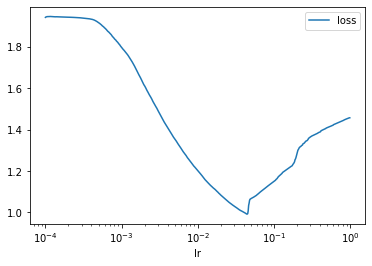

In [10]:
#%%
from numpy.core.numeric import False_
import optuna
import numpy as np
import tensorflow as tf
from tensorflow.python.keras.layers.wrappers import Bidirectional
import torch.nn as nn
import joblib
from preprocessing_helpers import *
from data_collecting import hashtags
from tensorflow import keras
import os

try:
    import boto3

    s3 = boto3.resource(
        "s3",
        region_name="us-east-1",
        aws_secret_access_key=os.getenv("AWS_SECRET_AK"),
        aws_access_key_id=os.getenv("AWS_AK"),
    )
    bucket = s3.Bucket("ids703-nlp-finalproject")
    SAVE_TO_S3 = True
    print("[INFO] S3 connection successful.")
except:
    print("[ERROR] Could not connect to S3! Only saving locally.")
    SAVE_TO_S3 = False


#%%
# Load data from disk
encoder = joblib.load("../artefacts/encoder.pickle")


synth_train = pd.read_parquet("../data/synth_train.parquet")
synth_val = pd.read_parquet("../data/synth_val.parquet")
synth_test = pd.read_parquet("../data/synth_test.parquet")

xtrain, ytrain = encode_dataframe(encoder, data=synth_train, mode="pytorch")
xval, yval = encode_dataframe(encoder, data=synth_val, mode="pytorch")
xtest, ytest = encode_dataframe(encoder, data=synth_test, mode="pytorch")

# Pad my input sequence with zeros
xtrain = nn.utils.rnn.pad_sequence(sequences=xtrain, batch_first=True, padding_value=0.0)
xval = nn.utils.rnn.pad_sequence(sequences=xval, batch_first=True, padding_value=0.0)
xtest = nn.utils.rnn.pad_sequence(sequences=xtest, batch_first=True, padding_value=0.0)

#%%
BATCH_SIZE = 64
LEARNING_RATE = 10 ** -2.5
NUM_EPOCHS = 1


#%%
from tf_hyperparameter_tuning import get_compiled_model

FINAL_PARAMS = {
    "embedding_dim": 2 ** 5,
    "hidden_size": 2 ** 6,
    "hidden_dense_dim": 2 ** 6,
    "dropout_rate": 0.1,
    "l2_reg": 0,
}

model = get_compiled_model(**FINAL_PARAMS, learning_rate=LEARNING_RATE)

#%%
# ----------------------------------------- Synthetic Data -----------------------------------------
# TODO: change to synth!
synth_train_dataset = tf.data.Dataset.from_tensor_slices(
    (xtrain, ytrain.cat.codes.values)
).batch(BATCH_SIZE)
synth_val_dataset = tf.data.Dataset.from_tensor_slices((xval, yval.cat.codes.values)).batch(
    BATCH_SIZE
)

from learningrate_rangetest import LRFinder

lr_finder = LRFinder(model)
lr_finder.find(
    synth_train_dataset,
    start_lr=0.0001,
    end_lr=1,
    batch_size=BATCH_SIZE,
    epochs=1,
    steps_per_epoch=np.ceil(len(xtrain) / BATCH_SIZE),
)

lr_finder.plot()